In [1]:
import sys
sys.path.append('../')

from envs.GridMaps import maze5x5, maze14x14
from utilities.transitionDatasetGeneration import *

In [2]:
train = True

shape = "14x14"

if shape == "5x5":
    maze = maze5x5["maze"]
    n_models = 9
    n_epochs = 5000
elif shape == "14x14":
    maze = maze14x14["maze"]
    n_models = 23
    n_epochs = 5000

In [3]:
def transitions_maker(transiciones_iniciales, n):
    n_transiciones_iniciales = len(transiciones_iniciales)    
    nuevos_arrays = []

    for _ in range(n):
        # Crear una copia de las transiciones iniciales
        nuevas_transiciones = transiciones_iniciales.copy()

        # Repetir aleatoriamente un 33% transiciones
        transiciones_a_repetir = random.sample(nuevas_transiciones, int((1 - 0.66) * n_transiciones_iniciales))
        nuevas_transiciones.extend(transiciones_a_repetir)

        nuevos_arrays.append(nuevas_transiciones)

    return nuevos_arrays

In [4]:
all_transitions = transition_generator(maze)
new_transitions = transitions_maker(all_transitions, n_models)
#count_original_transitions(all_transitions, new_transitions)

In [5]:
if train:
    models_arr = []

    for i in range(len(new_transitions)):
        model = ModelTrainer(i, shape, new_transitions[i], n_epochs)

        print("Training model", i + 1, "/", n_models, "...")
        model.train(test_size=0.2)

        models_arr.append(model)

Training model 1 / 23 ...
Trained successfully!
Final loss: 0.08261974155902863

Training model 2 / 23 ...
Trained successfully!
Final loss: 0.08049418777227402

Training model 3 / 23 ...
Trained successfully!
Final loss: 0.08202601224184036

Training model 4 / 23 ...
Trained successfully!
Final loss: 0.07131128758192062

Training model 5 / 23 ...
Trained successfully!
Final loss: 0.06949427723884583

Training model 6 / 23 ...
Trained successfully!
Final loss: 0.08385514467954636

Training model 7 / 23 ...
Trained successfully!
Final loss: 0.07031606137752533

Training model 8 / 23 ...
Trained successfully!
Final loss: 0.08738940209150314

Training model 9 / 23 ...
Trained successfully!
Final loss: 0.08280371129512787

Training model 10 / 23 ...
Trained successfully!
Final loss: 0.0830344408750534

Training model 11 / 23 ...
Trained successfully!
Final loss: 0.08249921351671219

Training model 12 / 23 ...
Trained successfully!
Final loss: 0.08214515447616577

Training model 13 / 23 ...

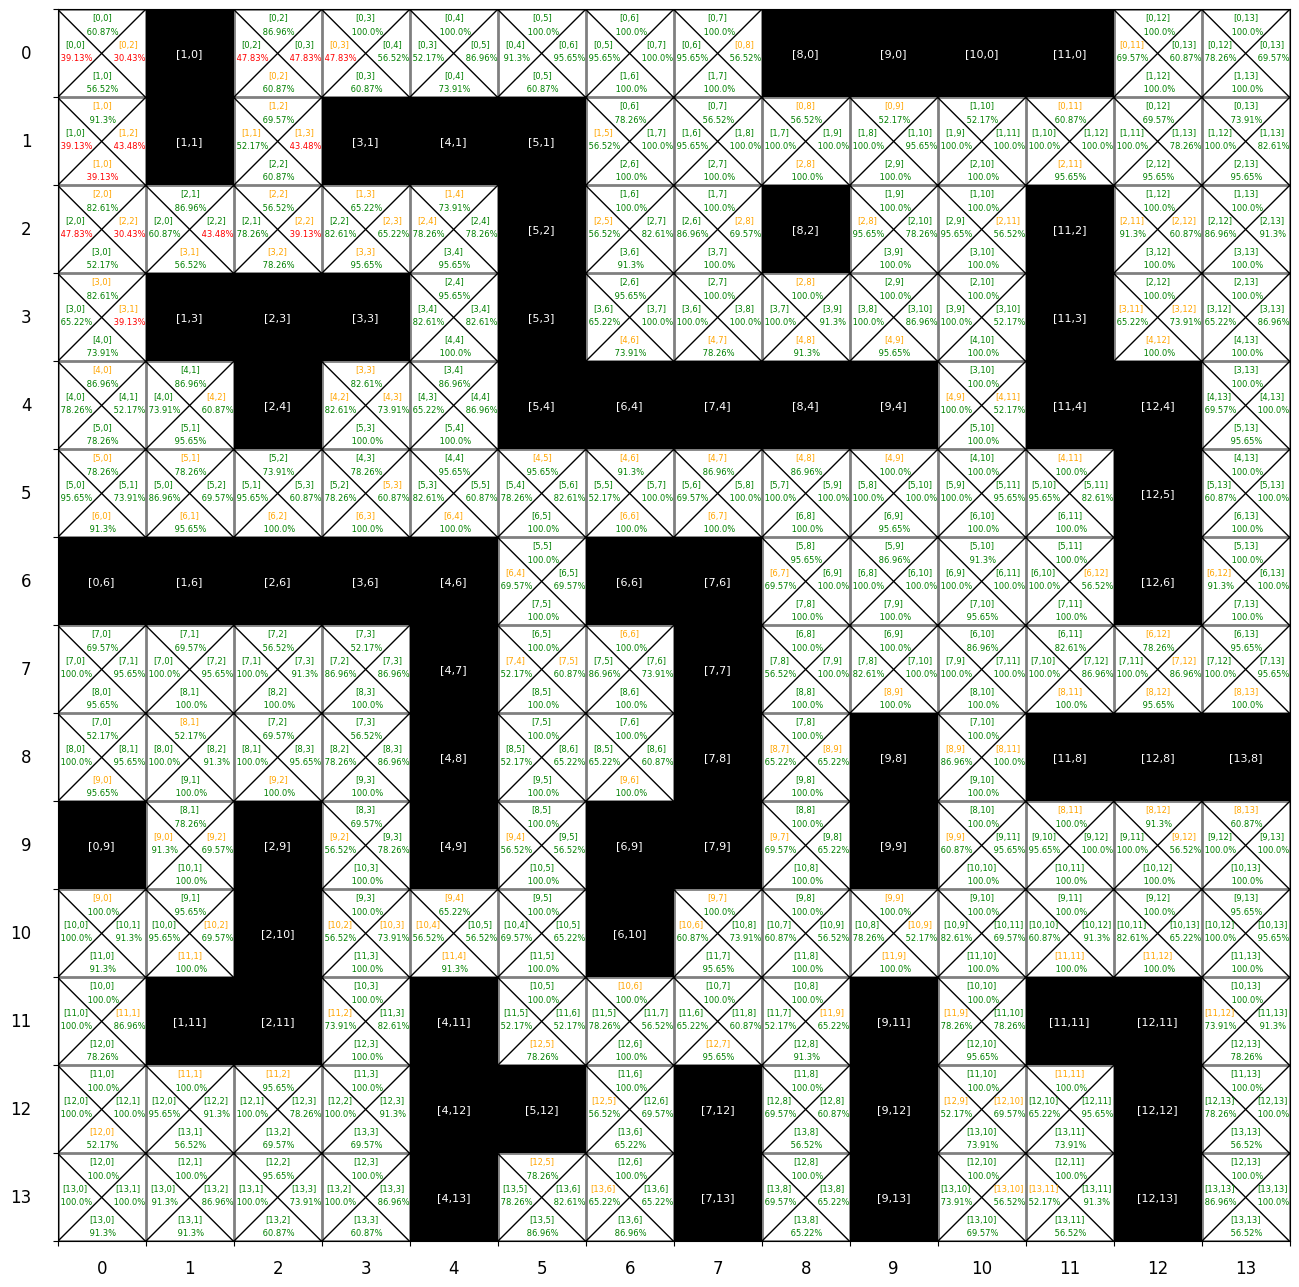

In [6]:
probMapper(maze, n_models, threshold=50)